#**DATA VISUALISATION**<br>
##Effect of COVID-19 on Global economy, Unemployment Rate and Start-up Funding<br><br>

#####Arpan Ghosh-19BCE1009<br>
#####Anthra Devarajan- 19BCE1681

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly
plotly.offline.init_notebook_mode (connected = True)
import warnings
import copy
warnings.filterwarnings("ignore")

# Dataset Preparation


## Dataset 1

In [ ]:
data=pd.read_csv('2020 unemployment.csv')
data.describe()

,Value
count,535.000000
mean,7.201314
std,4.109855
min,2.000000
25%,4.300000
50%,6.300000
75%,8.600000
max,25.667460


In [ ]:
data

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,HUR,TOT,PC_LF,M,2020-01,5.269611,NaN
1,AUS,HUR,TOT,PC_LF,M,2020-02,5.081623,NaN
2,AUS,HUR,TOT,PC_LF,M,2020-03,5.220101,NaN
3,AUS,HUR,TOT,PC_LF,M,2020-04,6.358871,NaN
4,AUS,HUR,TOT,PC_LF,M,2020-05,7.068942,NaN
...,...,...,...,...,...,...,...,...
530,JPN,HUR,WOMEN,PC_LF,M,2020-06,2.500000,NaN
531,JPN,HUR,WOMEN,PC_LF,M,2020-07,2.700000,NaN
532,JPN,HUR,WOMEN,PC_LF,M,2020-08,2.900000,NaN
533,JPN,HUR,WOMEN,PC_LF,M,2020-09,2.700000,NaN


## Dataset 2

In [ ]:
data2=pd.read_csv('transformed_data.csv')



1.   Code
2.   Country
3.   Date
4.   HDI : human_development_index
5.   TC : total_cases
6.   TD : total_deaths
7.   STI : stringency_index
8.   POP : population
9.   GDPCAP : gdp_per_capita

In [ ]:
data2

,CODE,COUNTRY,DATE,HDI,TC,TD,STI,POP,GDPCAP
0,AFG,Afghanistan,2019-12-31,0.498,0.000000,0.000000,0.000000,17.477233,7.497754
1,AFG,Afghanistan,2020-01-01,0.498,0.000000,0.000000,0.000000,17.477233,7.497754
2,AFG,Afghanistan,2020-01-02,0.498,0.000000,0.000000,0.000000,17.477233,7.497754
3,AFG,Afghanistan,2020-01-03,0.498,0.000000,0.000000,0.000000,17.477233,7.497754
4,AFG,Afghanistan,2020-01-04,0.498,0.000000,0.000000,0.000000,17.477233,7.497754
...,...,...,...,...,...,...,...,...,...
50413,ZWE,Zimbabwe,2020-10-15,0.535,8.994048,5.442418,4.341855,16.514381,7.549491
50414,ZWE,Zimbabwe,2020-10-16,0.535,8.996528,5.442418,4.341855,16.514381,7.549491
50415,ZWE,Zimbabwe,2020-10-17,0.535,8.999496,5.442418,4.341855,16.514381,7.549491
50416,ZWE,Zimbabwe,2020-10-18,0.535,9.000853,5.442418,4.341855,16.514381,7.549491


Preprocessing

In [ ]:
s=data2['DATE'].str.split('-',expand=True)
data2['Year']=s[0]
data2['Month']=s[1]
data2.drop('DATE',axis=1,inplace=True)

data2.drop(index=0,inplace=True)
grouped_data2=data2.groupby(['CODE','Month']).mean()

grouped_data2['Code']=np.array(list(grouped_data2.index))[:,0]
grouped_data2['Month']=np.array(list(grouped_data2.index))[:,1]

new_data2=pd.DataFrame(grouped_data2.values,columns=grouped_data2.columns)

## Dataset 3

In [ ]:
!pwd

/content


In [ ]:
%pwd
import os
for dirname, _, filenames in os.walk('/content/IndiaUnemp/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
weekly_total = pd.read_csv('/content/Unemployment_Rate_W_Total.txt', header=1)
urban_weekly = pd.read_csv('/content/Unemployment_Rate_W_Urban.txt', header=1)
urban_weekly.columns = ['region', 'date', 'frequancy', 'estimated_unemployement_rate_%','estimated_employed', 'estimated_labour_participation_rate_%']
rural_weekly = pd.read_csv('/content/Unemployment_Rate_W_Rural.txt', header=1)
rural_weekly.columns =  ['region', 'date', 'frequancy', 'estimated_unemployement_rate_%','estimated_employed', 'estimated_labour_participation_rate_%']
urban_weekly['region_type'] = 'urban'
rural_weekly['region_type'] = 'rural'
weekly_total.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,298.000000,2.980000e+02,298.000000
mean,7.566544,3.988267e+08,43.098188
std,3.643561,2.333640e+07,2.558794
min,2.880000,2.707296e+08,35.370000
25%,5.852500,3.969213e+08,41.565000
50%,7.095000,4.028279e+08,43.120000
75%,8.355000,4.087454e+08,44.167500
max,27.110000,4.371088e+08,49.810000


In [ ]:
weekly_total.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
0,India,03-01-2016,W,8.97,303166709.0,35.55
1,India,10-01-2016,W,10.19,399045948.0,47.41
2,India,17-01-2016,W,6.86,411660428.0,47.14
3,India,24-01-2016,W,6.06,418592936.0,47.50
4,India,31-01-2016,W,11.42,393343265.0,47.31


In [ ]:
fig3 = px.bar(weekly_total, x=' Date', y=' Estimated Unemployment Rate (%)')
fig3.show(renderer = "colab")

In [ ]:
rural_weekly['4_w_rolling_avg']=rural_weekly['estimated_unemployement_rate_%'].rolling(window=4, min_periods=0).mean()
urban_weekly['4_w_rolling_avg']=urban_weekly['estimated_unemployement_rate_%'].rolling(window=4, min_periods=0).mean()
combined_weekly_df = urban_weekly.append(rural_weekly)
combined_weekly_df.head()

,region,date,frequancy,estimated_unemployement_rate_%,estimated_employed,estimated_labour_participation_rate_%,region_type,4_w_rolling_avg
0,India,03-01-2016,W,8.30,110447642.0,38.44,urban,8.300
1,India,10-01-2016,W,10.41,126412852.0,45.01,urban,9.355
2,India,17-01-2016,W,9.67,126174091.0,44.54,urban,9.460
3,India,24-01-2016,W,9.78,127746557.0,45.13,urban,9.540
4,India,31-01-2016,W,9.78,124854386.0,44.09,urban,9.910


## Dataset 4

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import calendar
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
from IPython.display import HTML

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# Graphics in retina format 
%config InlineBackend.figure_format = 'retina' 

In [ ]:
kaggle_2020 = pd.read_csv("/content/kaggle_survey_2020_responses.csv" , header = 1)
kaggle_2020.head()

,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Select the title most similar to your current role (or most recent title if retired): - Selected Choice,For how many years have you been writing code and/or programming?,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - R,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - SQL,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - C,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - C++,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Java,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Javascript,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Julia,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Swift,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Bash,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - MATLAB,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - None,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Other,What programming language would you recommend an aspiring data scientist to learn first? - Selected Choice,"Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice - Jupyter (JupyterLab, Jupyter Notebooks, etc)",Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice - RStudio,Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice - Visual Studio / Visual Studio Code,Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice - Click to write Choice 13,Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice - PyCharm,Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice - Spyder,Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice - Notepad++,Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice - Sublime Text,Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice - Vim / Emacs,Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice - MATLAB,Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice - None,Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice - Other,Which of the following hosted notebook products do you use on a regular basis? (Select all that apply) - Selected Choice - Kaggle Notebooks,Which of the following hosted notebook products do you u

In [ ]:
kaggle_2020.columns

Index(['Duration (in seconds)', 'What is your age (# years)?', 'What is your gender? - Selected Choice', 'In which country do you currently reside?', 'What is the highest level of formal education that you have attained or plan to attain within the next 2 years?', 'Select the title most similar to your current role (or most recent title if retired): - Selected Choice', 'For how many years have you been writing code and/or programming?', 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python', 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - R', 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - SQL',
       ...
       'In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice -  Weights & Biases ', 'In the next 2 years, do you hope to 

In [ ]:
kaggle_2020['Duration (in seconds)']=kaggle_2020['Duration (in seconds)'].apply(pd.to_numeric, errors='coerce')
kaggle_2020.rename(columns={'Duration (in seconds)': 'time_spent_secs'}, inplace=True)

## Dataset 5

In [ ]:
import os
for dirname, _, filenames in os.walk('/content'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/startup_funding.csv
/content/kaggle_survey_2020_responses.csv
/content/transformed_data.csv
/content/Unemployment_Rate_W_Total.txt
/content/Unemployment_Rate_W_Urban.txt
/content/Unemployment_Rate_W_Rural.txt
/content/2020 unemployment.csv
/content/.config/.last_opt_in_prompt.yaml
/content/.config/config_sentinel
/content/.config/gce
/content/.config/.feature_flags_config.yaml
/content/.config/.last_survey_prompt.yaml
/content/.config/active_config
/content/.config/.last_update_check.json
/content/.config/.metricsUUID
/content/.config/logs/2022.04.25/13.44.40.300129.log
/content/.config/logs/2022.04.25/13.45.57.322566.log
/content/.config/logs/2022.04.25/13.45.56.473227.log
/content/.config/logs/2022.04.25/13.45.04.903240.log
/content/.config/logs/2022.04.25/13.45.25.561751.log
/content/.config/logs/2022.04.25/13.45.35.063887.log
/content/.config/configurations/config_default
/content/sample_data/anscombe.json
/content/sample_data/README.md
/content/sample_data/mnist_test.csv


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
data5= pd.read_csv('/content/startup_funding.csv',index_col = "Date dd/mm/yyyy", parse_dates= True)
data5.head()

,Sr No,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD
Date dd/mm/yyyy,,,,,,,,
09-01-2020,1,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000"
13-01-2020,2,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394"
09-01-2020,3,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860"
02-01-2020,4,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000"
02-01-2020,5,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000"


In [ ]:
data5.columns

Index(['Sr No', 'Startup Name', 'Industry Vertical', 'SubVertical', 'City  Location', 'Investors Name', 'InvestmentnType', 'Amount in USD'], dtype='object')

In [ ]:
data5.drop('Sr No',axis =1 ,inplace = True)
data5.head()

,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD
Date dd/mm/yyyy,,,,,,,
09-01-2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000"
13-01-2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394"
09-01-2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860"
02-01-2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000"
02-01-2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000"


In [ ]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2998 entries, 09-01-2020 to 31-01-2015
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Startup Name       2998 non-null   object
 1   Industry Vertical  2827 non-null   object
 2   SubVertical        2073 non-null   object
 3   City  Location     2818 non-null   object
 4   Investors Name     2975 non-null   object
 5   InvestmentnType    2994 non-null   object
 6   Amount in USD      2065 non-null   object
dtypes: object(7)
memory usage: 187.4+ KB


In [ ]:
len(data5['City  Location'].unique())

106

# Data Visualisation

In [ ]:
s=data['TIME'].str.split('-',expand=True)
data['Year']=s[0]
data['Month']=s[1]
data.drop('TIME',axis=1,inplace=True)
fig1=px.scatter_geo(data,color="Value",locationmode="ISO-3",locations="LOCATION",opacity=0.6,
                     hover_name="LOCATION", size="Value",projection='conic equal area',animation_group ="LOCATION",color_continuous_scale='blackbody',
                     animation_frame="Month",scope='world',symbol='MEASURE',template="plotly_dark",title='Impact of lockdown on employement across world from January to October 2020' )
fig1.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 400

fig1.update_geos(
    landcolor="white",
    oceancolor="#006994",
    showocean=True,
    lakecolor="LightBlue"
)

fig1.show(renderer="colab")

In [ ]:
grouped_month=data.groupby('Month').mean()
fig2 = px.bar(data_frame=grouped_month,x=grouped_month.index,color=grouped_month.index,y='Value',labels={'x':'Months'})
fig2.show(renderer = "colab")

In [ ]:
grouped_countries=data.groupby('LOCATION').mean()
grouped_countries.sort_values('Value',ascending=False,inplace=True)
fig3 = px.bar(data_frame=grouped_countries.iloc[:10,:],x=grouped_countries.index[:10],color=grouped_countries[:10].index,y='Value',labels={'x':'Countries'})
fig3.show(renderer = "colab")

In [ ]:
#merging the unemployment dataset and 
data.rename(columns={'LOCATION':'Code'},inplace=True)
merged_data=pd.merge(data,new_data2,on=['Code','Month'])
merged_data.head()

,Code,INDICATOR,SUBJECT,MEASURE,FREQUENCY,Value,Flag Codes,Year,Month,HDI,TC,TD,STI,POP,GDPCAP
0,AUS,HUR,TOT,PC_LF,M,5.269611,NaN,2020,01,0.939,0.299447,0.0,0.543707,17.054184,10.706581
1,AUS,HUR,MEN,PC_LF,M,5.350914,NaN,2020,01,0.939,0.299447,0.0,0.543707,17.054184,10.706581
2,AUS,HUR,WOMEN,PC_LF,M,5.179362,NaN,2020,01,0.939,0.299447,0.0,0.543707,17.054184,10.706581
3,AUS,HUR,TOT,PC_LF,M,5.081623,NaN,2020,02,0.939,2.744907,0.0,2.967333,17.054184,10.706581
4,AUS,HUR,MEN,PC_LF,M,5.231085,NaN,2020,02,0.939,2.744907,0.0,2.967333,17.054184,10.706581


In [ ]:
merged_data.drop('Flag Codes',axis=1,inplace=True)
for i in merged_data.columns[6:]:
    merged_data[i]=pd.to_numeric(merged_data[i])
merged_data.drop('Year',axis=1,inplace=True)

In [ ]:
x=list(merged_data.corr().columns)
y=list(merged_data.corr().index)
values=np.array(merged_data.corr().values)
fig = go.Figure(data=go.Heatmap(z=values, x=x, y=y, hoverongaps = False))
fig.show(renderer="colab")

In [ ]:
fig4 = px.bar(data_frame=merged_data,x='Month',y='STI',color='SUBJECT')
fig4.show(renderer = "colab")

In [ ]:
fig5 = px.scatter(merged_data.groupby('Code').mean(),x='HDI',y='GDPCAP',size='Value',color=merged_data.groupby('Code').mean().index)
fig5.show(renderer = "colab")

In [ ]:
weekly_total.columns = ['region', 'date', 'frequancy', 'estimated_unemployement_rate_%','estimated_employed', 'estimated_labour_participation_rate_%']
weekly_total.head()

,region,date,frequancy,estimated_unemployement_rate_%,estimated_employed,estimated_labour_participation_rate_%
0,India,03-01-2016,W,8.97,303166709.0,35.55
1,India,10-01-2016,W,10.19,399045948.0,47.41
2,India,17-01-2016,W,6.86,411660428.0,47.14
3,India,24-01-2016,W,6.06,418592936.0,47.50
4,India,31-01-2016,W,11.42,393343265.0,47.31


In [ ]:
fig6 = px.bar(combined_weekly_df, x='date', y='estimated_unemployement_rate_%', color='region_type', barmode='group', title='Weekly unemployenment by region type')
fig6.show(renderer = "colab")

In [ ]:
fig7 = px.line(combined_weekly_df, x='date', y='4_w_rolling_avg', color='region_type', title='4 weeks avg unemployenment rate by region type')
fig7.show(renderer = "colab")

# Model Implementation

**Models ** <br>
Probabilistic autoregressive models, <Br>
ARIMA <br>
LSTM <br>


### **ARIMA model**

In [ ]:
!pip install pmdarima

     |████████████████████████████████| 1.4 MB 8.8 MB/s 
     |████████████████████████████████| 9.8 MB 43.2 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


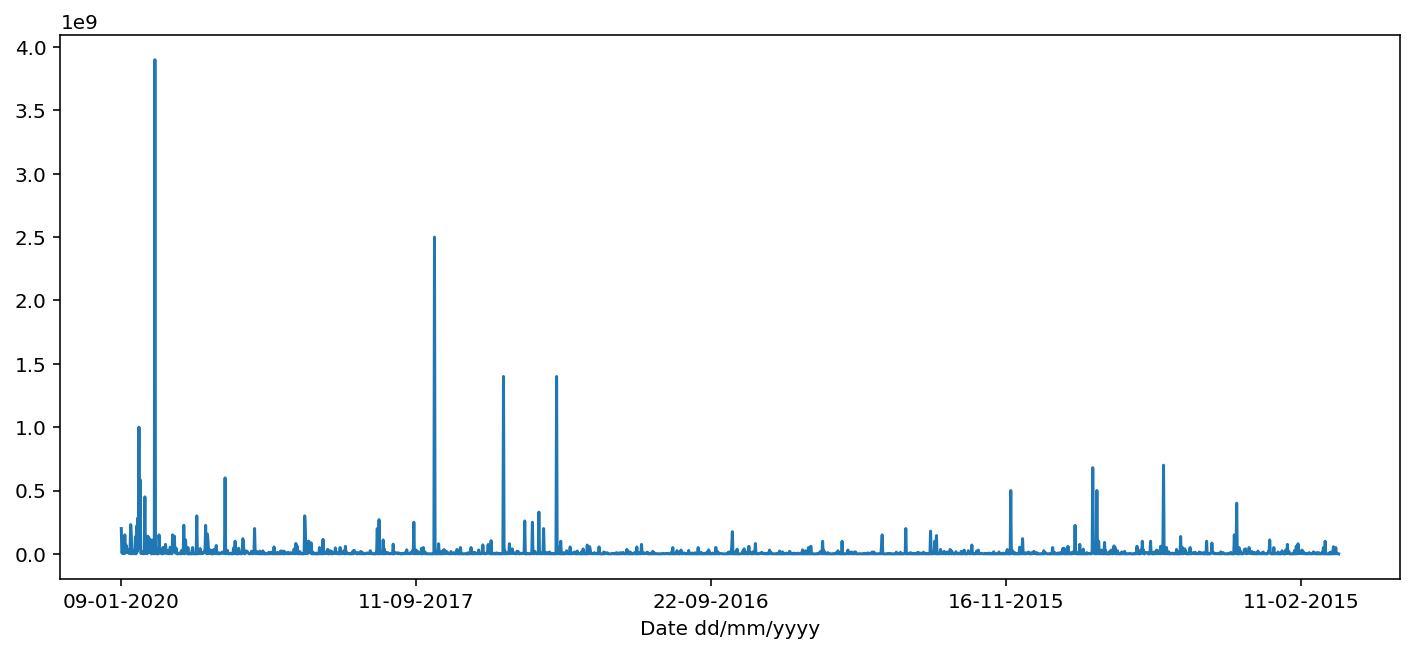

In [ ]:
data5['Amount in USD'] = data5['Amount in USD'].str.replace(',', '').astype(float)
data5 = data5[data5['Amount in USD'].notna()]
data5['Amount in USD'].astype(float).astype(int)
data5['Amount in USD'].plot(figsize=(12,5))

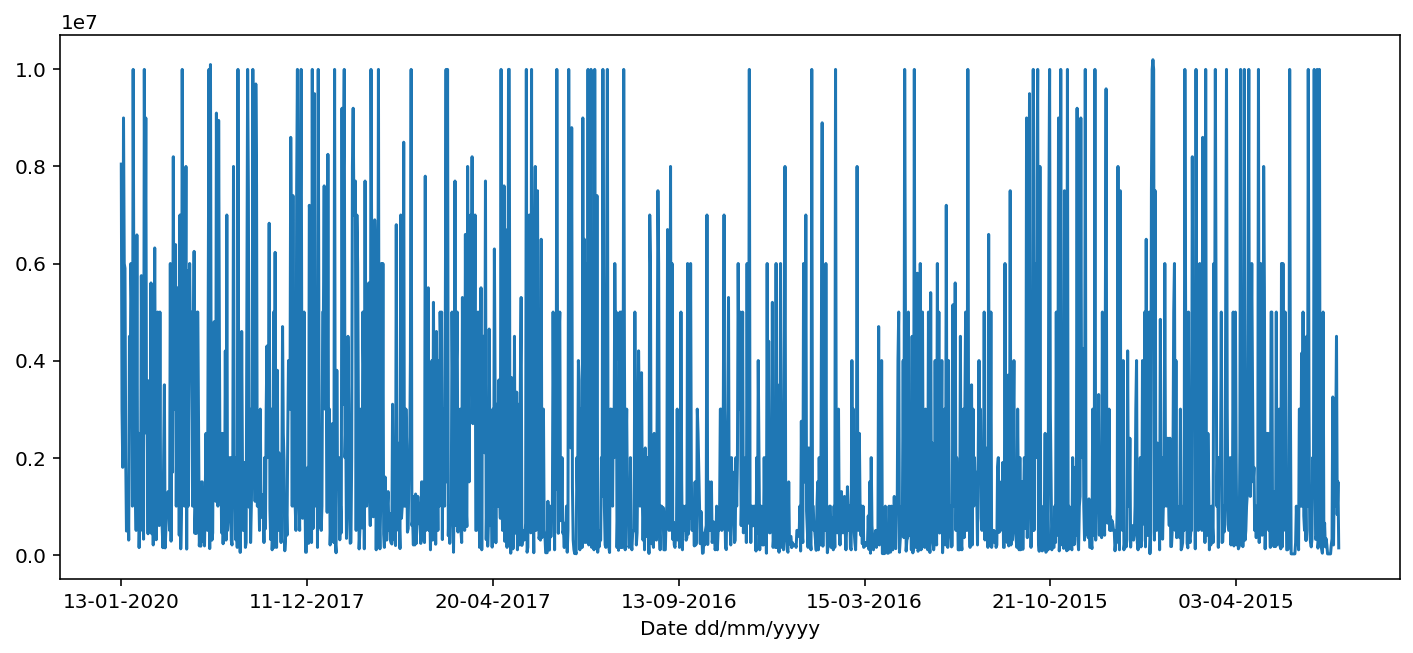

In [ ]:
from scipy import stats
data5 = data5[(np.abs(stats.zscore(data5['Amount in USD'])) < 0.75)]
data5['Amount in USD'].plot(figsize=(12,5))

In [ ]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [ ]:
stepwise_fit = auto_arima(data5['Amount in USD'], trace = True , supress_warnings = True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=53056.674, Time=0.94 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=54101.810, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=53696.198, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=53080.501, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=54099.814, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=53055.623, Time=0.65 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=53068.042, Time=0.47 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=53081.571, Time=0.46 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=53048.691, Time=1.16 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=53051.837, Time=0.73 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=53048.128, Time=3.93 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=53050.463, Time=3.86 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=7.11 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=53047.554, Time=3.66 sec
 ARIMA(0,1,4)(0,0,0)[0] i

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1639
Model:               SARIMAX(0, 1, 5)   Log Likelihood              -26513.701
Date:                Fri, 29 Apr 2022   AIC                          53039.403
Time:                        01:05:28   BIC                          53071.810
Sample:                             0   HQIC                         53051.423
                               - 1639                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9580      0.026    -37.395      0.000      -1.008      -0.908
ma.L2         -0.0637      0.038     -1.685      0.092      -0.138       0.010
ma.L3          0.0933      0.036      2.584      0.010       0.023       0.164
ma.L4         -0.0283      0.034     -0.839      0.401      -0.095       0.038
ma.L5         -0.0308      0.025     -1.256      0.209      -0.079       0.017
sigma2      7.072e+12   8.21e-16   8.61e+27      0.000    7.07e+12    7.07e+12
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               821.74
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.91   Skew:                             1.52
Prob(H) (two-sided):                  0.26   Kurtosis:                         4.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.9e+43. Standard errors may be unstable.
"""

In [ ]:
from statsmodels.tsa.arima.model import ARIMA 

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data5, test_size=0.3)

In [ ]:
model = ARIMA(train['Amount in USD'],order=(0,1,5))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          Amount in USD   No. Observations:                 1147
Model:                 ARIMA(0, 1, 5)   Log Likelihood              -18605.360
Date:                Fri, 29 Apr 2022   AIC                          37222.721
Time:                        01:20:35   BIC                          37252.985
Sample:                             0   HQIC                         37234.147
                               - 1147                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9979      0.034    -29.186      0.000      -1.065      -0.931
ma.L2         -0.0019      0.043     -0.044      0.965      -0.086       0.082
ma.L3         -0.0060      0.045     -0.133      0.894      -0.094       0.082
ma.L4         -0.0345      0.049     -0.712      0.477      -0.130       0.061
ma.L5          0.0408      0.033      1.229      0.219      -0.024       0.106
sigma2      7.991e+12   2.09e-15   3.83e+27      0.000    7.99e+12    7.99e+12
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               495.06
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               0.85   Skew:                             1.48
Prob(H) (two-sided):                  0.11   Kurtosis:                         4.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.01e+42. Standard errors may be unstable.
"""

In [ ]:
start = len(train)
# print(data5.shape)
# print(train.shape,test.shape)
end = len(train)+len(test)-1
pred = model.predict(start = start , end= end , type='levels')
print(pred)

1147    2.334137e+06
1148    2.234174e+06
1149    2.318377e+06
1150    2.228154e+06
1151    2.255350e+06
1152    2.255350e+06
1153    2.255350e+06
1154    2.255350e+06
1155    2.255350e+06
1156    2.255350e+06
1157    2.255350e+06
1158    2.255350e+06
1159    2.255350e+06
1160    2.255350e+06
1161    2.255350e+06
1162    2.255350e+06
1163    2.255350e+06
1164    2.255350e+06
1165    2.255350e+06
1166    2.255350e+06
1167    2.255350e+06
1168    2.255350e+06
1169    2.255350e+06
1170    2.255350e+06
1171    2.255350e+06
1172    2.255350e+06
1173    2.255350e+06
1174    2.255350e+06
1175    2.255350e+06
1176    2.255350e+06
1177    2.255350e+06
1178    2.255350e+06
1179    2.255350e+06
1180    2.255350e+06
1181    2.255350e+06
1182    2.255350e+06
1183    2.255350e+06
1184    2.255350e+06
1185    2.255350e+06
1186    2.255350e+06
1187    2.255350e+06
1188    2.255350e+06
1189    2.255350e+06
1190    2.255350e+06
1191    2.255350e+06
1192    2.255350e+06
1193    2.255350e+06
1194    2.255

In [ ]:
# pred = pred.to_frame().reset_index()
pred.index = test.index
pred

Date dd/mm/yyyy
29-01-2016    2.334137e+06
24-02-2016    2.234174e+06
01-05-2015    2.318377e+06
19-02-2016    2.228154e+06
02-02-2015    2.255350e+06
02-11-2016    2.255350e+06
18-07-2018    2.255350e+06
24-12-2015    2.255350e+06
08-01-2016    2.255350e+06
12-07-2018    2.255350e+06
06-01-2015    2.255350e+06
16-02-2016    2.255350e+06
02-07-2018    2.255350e+06
29-06-2017    2.255350e+06
24-09-2015    2.255350e+06
27-06-2017    2.255350e+06
05-10-2017    2.255350e+06
27-06-2016    2.255350e+06
16-12-2015    2.255350e+06
23-05-2017    2.255350e+06
06-09-2016    2.255350e+06
08-07-2019    2.255350e+06
15-06-2015    2.255350e+06
23-08-2017    2.255350e+06
18-09-2015    2.255350e+06
08-05-2015    2.255350e+06
08-03-2017    2.255350e+06
22-05-2015    2.255350e+06
02-08-2017    2.255350e+06
02-03-2017    2.255350e+06
01-09-2015    2.255350e+06
24-02-2016    2.255350e+06
30-11-2016    2.255350e+06
25-01-2015    2.255350e+06
16-06-2015    2.255350e+06
23-06-2015    2.255350e+06
28-01-2016  

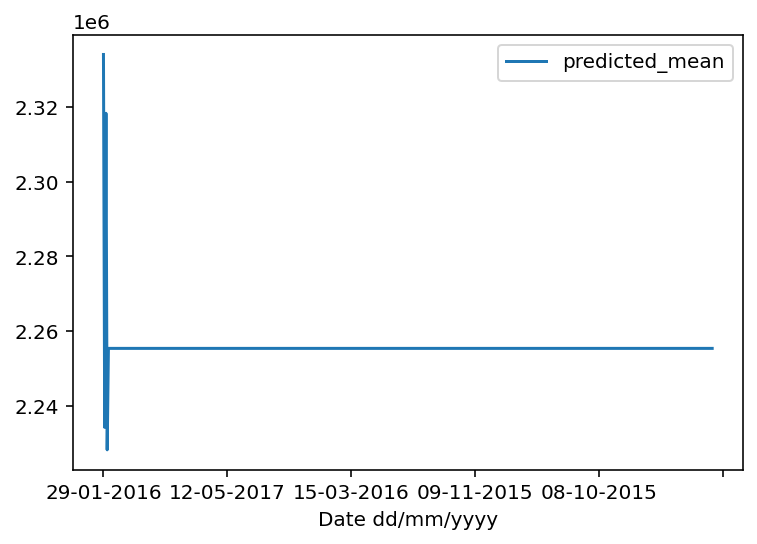

In [ ]:
pred.plot(legend=True)
# test["Amount in USD"].plot(legend=True)

### **LSTM**

In [ ]:
merged_data.head()

,Code,INDICATOR,SUBJECT,MEASURE,FREQUENCY,Value,Month,HDI,TC,TD,STI,POP,GDPCAP
0,AUS,HUR,TOT,PC_LF,M,5.269611,1,0.939,0.299447,0.0,0.543707,17.054184,10.706581
1,AUS,HUR,MEN,PC_LF,M,5.350914,1,0.939,0.299447,0.0,0.543707,17.054184,10.706581
2,AUS,HUR,WOMEN,PC_LF,M,5.179362,1,0.939,0.299447,0.0,0.543707,17.054184,10.706581
3,AUS,HUR,TOT,PC_LF,M,5.081623,2,0.939,2.744907,0.0,2.967333,17.054184,10.706581
4,AUS,HUR,MEN,PC_LF,M,5.231085,2,0.939,2.744907,0.0,2.967333,17.054184,10.706581


In [ ]:
data6 = merged_data.loc[merged_data['Code'] == "FRA"]

In [ ]:
data6 = data6.loc[data6['SUBJECT'] == "TOT"]

In [ ]:
# Remove column name 'A'
data7 = data6.drop(['INDICATOR','SUBJECT','MEASURE','FREQUENCY','Code'], axis = 1)
data7

,Value,Month,HDI,TC,TD,STI,POP,GDPCAP
110,7.7,1,0.901,0.296192,0.000000,0.661566,17.994097,10.561154
111,7.5,2,0.901,2.401395,0.071705,2.690581,17.994097,10.561154
112,8.0,3,0.901,8.220290,4.625765,4.158773,17.994097,10.561154
113,7.3,4,0.901,11.462714,9.525091,4.476882,17.994097,10.561154
114,7.2,5,0.901,11.853622,10.205950,4.355558,17.994097,10.561154
115,6.9,6,0.901,11.965686,10.289245,4.061203,17.994097,10.561154
116,9.4,7,0.901,12.066337,10.311116,3.671290,17.994097,10.561154
117,9.0,8,0.901,12.296454,10.322832,3.676138,17.994097,10.561154
118,8.8,9,0.901,12.886039,10.344862,3.814188,17.994097,10.561154
119,8.6,10,0.901,13.454809,10.393462,1.821329,17.994097,10.561154


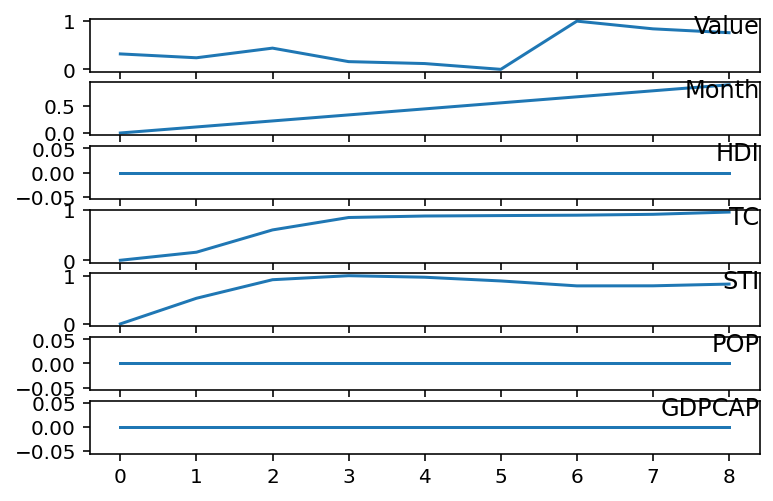

In [ ]:
from matplotlib import pyplot
# specify columns to plot
groups = [0, 1, 2, 3, 5, 6, 7]
i = 1
# plot each column
pyplot.figure()
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values[:, group])
	pyplot.title(data7.columns[group], y=0.5, loc='right')
	i += 1
pyplot.show()

In [ ]:
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
 
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
# dataset = read_csv('pollution.csv', header=0, index_col=0)
values = data7.values
# integer encode direction
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  var7(t-1)  var8(t-1)  var1(t)
1       0.32   0.000000        0.0   0.000000   0.000000   0.000000        0.0        0.0     0.24
2       0.24   0.111111        0.0   0.159987   0.111111   0.531808        0.0        0.0     0.44
3       0.44   0.222222        0.0   0.602198   0.222222   0.916623        0.0        0.0     0.16
4       0.16   0.333333        0.0   0.848609   0.333333   1.000000        0.0        0.0     0.12
5       0.12   0.444444        0.0   0.878316   0.444444   0.968201        0.0        0.0     0.00


In [ ]:
# split into train and test sets
values = reframed.values
# n_train_hours = 365 * 24
train = values[:9, :]
test = values[3:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(9, 1, 8) (9,) (6, 1, 8) (6,)


Epoch 1/50
1/1 - 3s - loss: 0.4809 - val_loss: 0.5782 - 3s/epoch - 3s/step
Epoch 2/50
1/1 - 0s - loss: 0.4729 - val_loss: 0.5694 - 27ms/epoch - 27ms/step
Epoch 3/50
1/1 - 0s - loss: 0.4650 - val_loss: 0.5607 - 26ms/epoch - 26ms/step
Epoch 4/50
1/1 - 0s - loss: 0.4570 - val_loss: 0.5519 - 25ms/epoch - 25ms/step
Epoch 5/50
1/1 - 0s - loss: 0.4490 - val_loss: 0.5432 - 27ms/epoch - 27ms/step
Epoch 6/50
1/1 - 0s - loss: 0.4411 - val_loss: 0.5344 - 25ms/epoch - 25ms/step
Epoch 7/50
1/1 - 0s - loss: 0.4331 - val_loss: 0.5257 - 27ms/epoch - 27ms/step
Epoch 8/50
1/1 - 0s - loss: 0.4252 - val_loss: 0.5169 - 27ms/epoch - 27ms/step
Epoch 9/50
1/1 - 0s - loss: 0.4172 - val_loss: 0.5081 - 26ms/epoch - 26ms/step
Epoch 10/50
1/1 - 0s - loss: 0.4092 - val_loss: 0.4993 - 30ms/epoch - 30ms/step
Epoch 11/50
1/1 - 0s - loss: 0.4012 - val_loss: 0.4936 - 28ms/epoch - 28ms/step
Epoch 12/50
1/1 - 0s - loss: 0.3952 - val_loss: 0.4882 - 28ms/epoch - 28ms/step
Epoch 13/50
1/1 - 0s - loss: 0.3896 - val_loss: 0.482

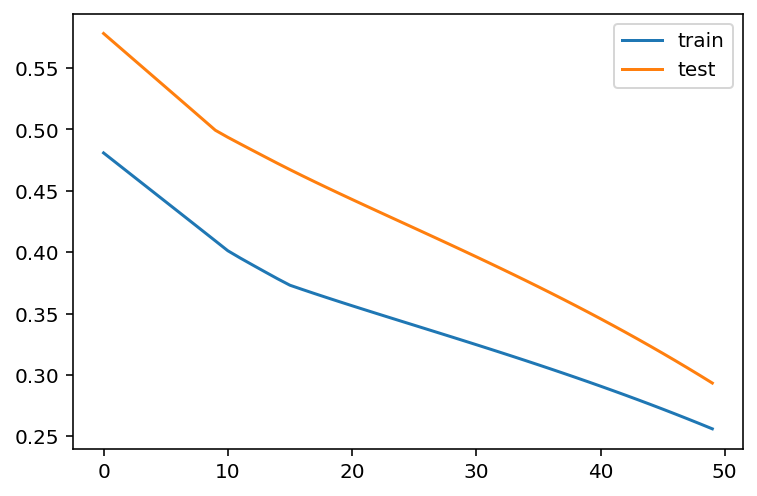

In [ ]:
import numpy
import keras.models
import tensorflow
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.core import Dense, Activation, Dropout
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
# make a prediction
from math import sqrt
from numpy import concatenate
from sklearn.metrics import mean_squared_error

yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.851
